In [11]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
from datetime import timedelta
import matplotlib.pyplot as plt
import time

In [12]:
time_initial = time.time()

First step is to build the neural network. This network has one convolutional layer with an input image size of 256 pixels by 256 pixels. There are 32 feature filters of size 3 by 3. the final neural network has a layer of 128 neurons that feeds into a final layer of 1 output neuron. The CNN uses the SGD optimizer

In [17]:
# PART 1 - Building the CNN

# Initialize the CNN
classifier = Sequential()

# Convolution step
classifier.add(Convolution2D(32, 3, 3, input_shape=(256, 256, 3), activation='relu'))

# Pooling step
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening step
classifier.add(Flatten())

# Full connection step
classifier.add(Dense(output_dim=128, activation='relu'))
classifier.add(Dense(output_dim=1, activation='sigmoid'))

# Compile the CNN
opt = SGD(lr=0.01)
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])

C:\Users\Dragonfly\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(256, 256,..., activation="relu")`
  import sys
C:\Users\Dragonfly\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  app.launch_new_instance()
C:\Users\Dragonfly\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


I broke the images up into 2 data sets. The training set consists of a folder of 4000 dog pictures and a folder of 4000 cat pictures. The test set consisits of a folder of 1000 dog pictures and a folder of 1000 cat pictures. 

In [18]:
# PART 2 - Fit images to the model
batch_size = 64
epochs = 12
# Augment the data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    'training_set',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(
    'test_set',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [19]:
# Train the Network
history = classifier.fit_generator(
    training_set,
    steps_per_epoch=1000,
    epochs=epochs,
    validation_data=test_set,
    nb_val_samples=2000,
    verbose=1)

# Save the model
classifier.save('model7-28-19.HDF5')

# Print the time elapsed building the model
time_elapsed = time.time() - time_initial
print("time elapsed: ", str(timedelta(seconds=time_elapsed))[:-5])

C:\Users\Dragonfly\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
C:\Users\Dragonfly\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=1000, epochs=12, validation_data=<keras_pre..., verbose=1, validation_steps=2000)`
  


Epoch 1/12
1000/1000 [==============================] - 3633s 4s/step - loss: 0.6635 - acc: 0.5953 - val_loss: 0.6227 - val_acc: 0.6535
Epoch 2/12
1000/1000 [==============================] - 3608s 4s/step - loss: 0.6100 - acc: 0.6634 - val_loss: 0.5808 - val_acc: 0.6941
Epoch 3/12
1000/1000 [==============================] - 3610s 4s/step - loss: 0.5782 - acc: 0.6966 - val_loss: 0.5627 - val_acc: 0.7101
Epoch 4/12
1000/1000 [==============================] - 3603s 4s/step - loss: 0.5496 - acc: 0.7200 - val_loss: 0.5778 - val_acc: 0.6876
Epoch 5/12
1000/1000 [==============================] - 3594s 4s/step - loss: 0.5195 - acc: 0.7426 - val_loss: 0.5525 - val_acc: 0.7289
Epoch 6/12
1000/1000 [==============================] - 3595s 4s/step - loss: 0.4892 - acc: 0.7663 - val_loss: 0.5589 - val_acc: 0.7297
Epoch 7/12
1000/1000 [==============================] - 3588s 4s/step - loss: 0.4568 - acc: 0.7874 - val_loss: 0.6649 - val_acc: 0.6803
Epoch 8/12
1000/1000 [==========================

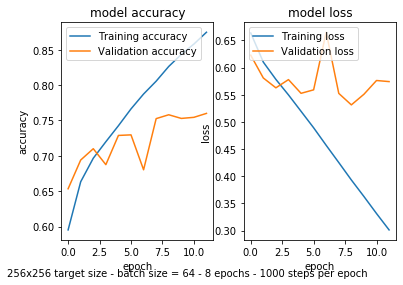

In [23]:
'''Plot the history of the model as it is trained'''
fig, (acc, loss) = plt.subplots(1, 2)
# Summarize history for accuracy
acc.plot(history.history['acc'])
acc.plot(history.history['val_acc'])
acc.title.set_text('model accuracy')
acc.set_ylabel('accuracy')
acc.set_xlabel('epoch')
acc.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
# Summarize history for loss
loss.plot(history.history['loss'])
loss.plot(history.history['val_loss'])
loss.title.set_text('model loss')
loss.set_ylabel('loss')
loss.set_xlabel('epoch')
loss.legend(['Training loss', 'Validation loss'], loc='upper left')
fig.text(x=0, y=0, s='256x256 target size - batch size = 64 - 8 epochs - 1000 steps per epoch', verticalalignment='baseline')
plt.savefig('model7-28-19')
plt.show()

It's apparent that after epoch ~5 the training accuracy continues to imporve while the test set accuracy doesn't. There are some slight improvement in validation accuracy after this point, but not enough to warrant adding more epochs and continuing without changes to the model. This stagnation suggests that there is overfitting in the training process. The first step in improving the model is adding more training data. Other improvements might include tweaking hyperparameters and regularization.
For now, it's easy to get a qualitative estimate on how this current model is performing. I loaded in images of cats and dogs that the model didn't see during training. These were named 1.jpg, 2.jpg, 3.jpg, ... , 20.jpg. I iterated through these images to see how well the model predicted the kind of animal it was seeing.

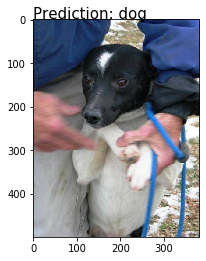

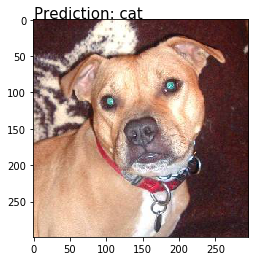

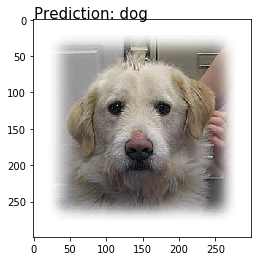

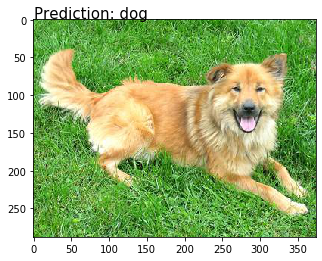

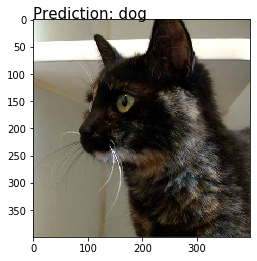

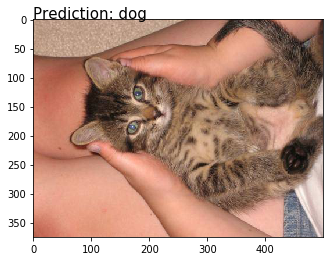

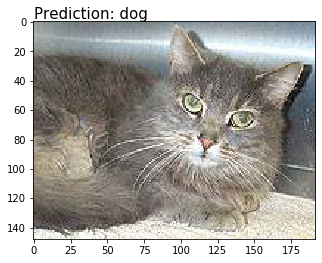

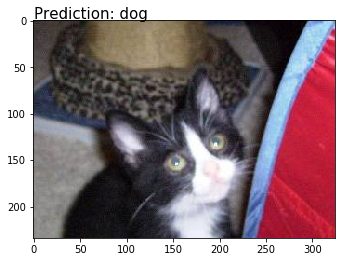

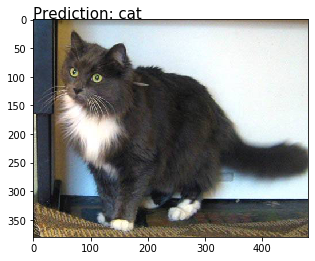

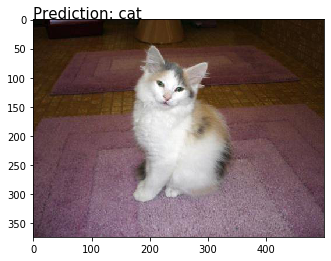

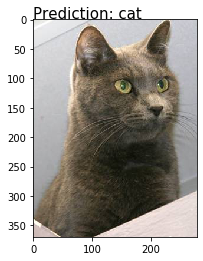

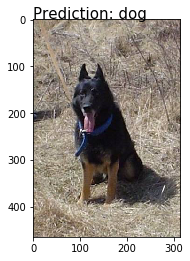

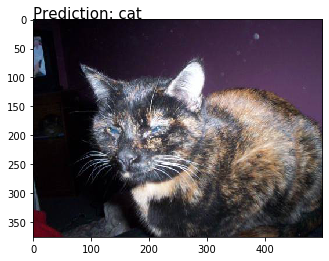

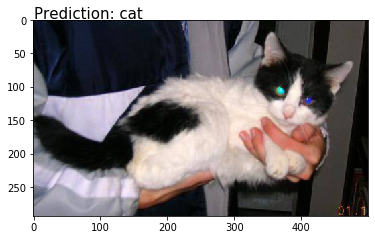

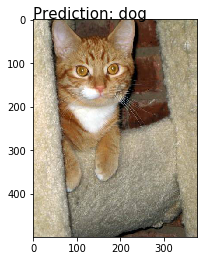

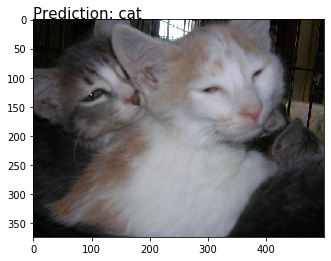

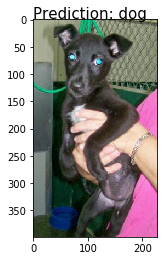

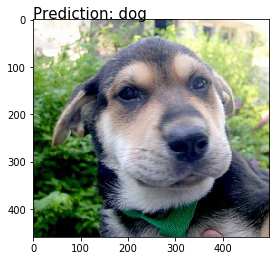

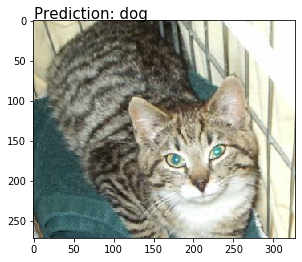

In [12]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

model = load_model('model7-28-19.HDF5')

# Test the model on new images 
for i in range(1, 20):
    test_image = image.load_img(str(i) + '.jpg', target_size=(256, 256))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = model.predict(test_image)
    
    if result[0][0] >= 0.5:
        prediction = 'dog'
    else:
        prediction = 'cat'
    
    img = mpimg.imread(str(i) +'.jpg')
    imgplot = plt.imshow(img)
    plt.text(x=0, y=-2, s='Prediction: ' + prediction, fontsize=15)
    plt.show()

The model got 12 / 20 predictions correct. Not great. However, there are several ways the model can be easily imporved. This will just take time to train the model using new parameters.